In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [9]:
# review measurements data
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [10]:
# review stations data
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [11]:
# review column and datatype
ins = inspect(engine)
columns = ins.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
# review column and datatype
ins = inspect(engine)
columns = ins.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data
start_date = dt.datetime(2017,8,23)
# Calculate the date 1 year ago from the last data point in the database
end_date = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores and sort by date
results = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= end_date).filter(Measurement.date <= start_date).\
    order_by(Measurement.date).all()

In [50]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df= pd.DataFrame(results).set_index('date')
prcp_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [90]:
prcp_df.to_dict()

{'prcp': {'2016-08-23': 0.7,
  '2016-08-24': 1.45,
  '2016-08-25': 0.11,
  '2016-08-26': 0.01,
  '2016-08-27': nan,
  '2016-08-28': 2.07,
  '2016-08-29': 0.9,
  '2016-08-30': 0.05,
  '2016-08-31': 2.46,
  '2016-09-01': 0.01,
  '2016-09-02': 0.03,
  '2016-09-03': 1.0,
  '2016-09-04': 0.44,
  '2016-09-05': 0.18,
  '2016-09-06': 1.0,
  '2016-09-07': 1.35,
  '2016-09-08': 0.15,
  '2016-09-09': 0.35,
  '2016-09-10': 1.16,
  '2016-09-11': 0.6,
  '2016-09-12': 1.04,
  '2016-09-13': 1.2,
  '2016-09-14': 6.7,
  '2016-09-15': 3.35,
  '2016-09-16': 0.61,
  '2016-09-17': 0.23,
  '2016-09-18': 0.42,
  '2016-09-19': 0.25,
  '2016-09-20': 0.43,
  '2016-09-21': 1.02,
  '2016-09-22': 0.75,
  '2016-09-23': 0.33,
  '2016-09-24': 0.27,
  '2016-09-25': 0.04,
  '2016-09-26': 1.02,
  '2016-09-27': 1.0,
  '2016-09-28': 0.05,
  '2016-09-29': 1.49,
  '2016-09-30': 0.38,
  '2016-10-01': 1.02,
  '2016-10-02': 0.61,
  '2016-10-03': 0.46,
  '2016-10-04': 3.46,
  '2016-10-05': 0.81,
  '2016-10-06': 0.04,
  '2016-10-

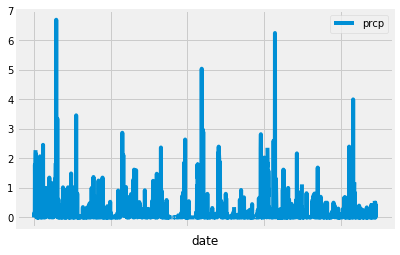

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Design a query to show how many stations are available in this dataset
number_of_station = session.query(Station).group_by(Station.station).count()
print (f"There are {number_of_station} stations.")

There are 9 stations.


In [29]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [33]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
lowest_temp = session.query(Measurement.station, func.min(Measurement.tobs)).all()
lowest_temp

[('USC00511918', 53.0)]

In [34]:
# highest temperature recorded, and average temperature most active station?
highest_temp = session.query(Measurement.station, func.max(Measurement.tobs)).all()
highest_temp

[('USC00519397', 87.0)]

In [35]:
avg_temp = session.query(Measurement.station, func.avg(Measurement.tobs)).all()
avg_temp

[('USC00519397', 73.09795396419437)]

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_ob = session.query(Measurement.tobs).\
    filter(Measurement.date >= end_date).filter(Measurement.date <= start_date).\
    filter(Measurement.station =='USC00519281').all()


In [40]:
temp_df= pd.DataFrame(temp_ob)
temp_df.head()

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


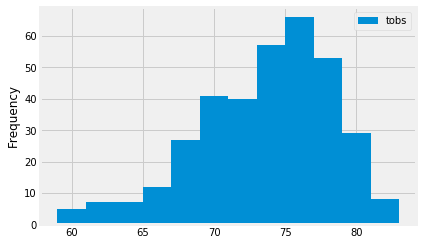

In [47]:
temp_df.plot(kind="hist", bins=12)


![precipitation](Images/station-histogram.png)

In [53]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(Start_date, End_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= Start_date).filter(Measurement.date <= End_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [56]:
trip_start_date= '2016-07-01'
trip_end_date= '2016-07-10'

In [62]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_results=(calc_temps(trip_start_date, trip_end_date))
print(trip_results)

[(71.0, 76.93333333333334, 82.0)]


In [63]:
tmin, tavg, tmax= np.ravel(trip_results)

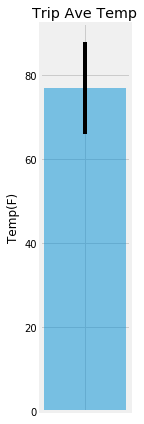

In [77]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
x= np.arange(0,1)
plt.figure(figsize=(2,6))
plt.bar(x,tavg, alpha=.5, width=.1,tick_label="",yerr=(tmax-tmin))
plt.title("Trip Ave Temp")
plt.ylabel("Temp(F)")
plt.tight_layout()

In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.

# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [82]:
sel=[Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation,Measurement.date, func.sum(Measurement.prcp), Measurement.station]

In [89]:

rain_results = session.query(*sel).\
    filter(Measurement.station==Station.station).\
    filter(Measurement.date >= trip_start_date).filter(Measurement.date <= trip_end_date).\
    group_by(Measurement.station).\
    order_by(Measurement.prcp.desc()).all()
    
print(rain_results)

[('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, '2016-07-01', 0.9, 'USC00513117'), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, '2016-07-01', 0.56, 'USC00514830'), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, '2016-07-01', 2.15, 'USC00519281'), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, '2016-07-01', 0.11, 'USC00519397'), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, '2016-07-01', 4.4399999999999995, 'USC00516128'), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, '2016-07-01', None, 'USC00517948'), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, '2016-07-02', 0.8200000000000001, 'USC00519523')]
